## Análisis de emanación de CO2 a nivel mundial. 

Instalación de paquetes en el archivo requirements.txt

In [11]:
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot Esto es fundamental para que funciones los gráfi cos de los paquetes extendidos de pandas. 
import missingno
import pandas as pd

In [12]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_csv('../data/raw/production_based_co2_emissions.csv')

In [14]:
%run pandas-missing-extension.ipynb

In [15]:
df.dtypes

ISO3                                      object
Country                                   object
Continent                                 object
Hemisphere                                object
Metric tons of CO2e per capita (1990)    float64
Metric tons of CO2e per capita (1995)    float64
Metric tons of CO2e per capita (2000)    float64
Metric tons of CO2e per capita (2005)    float64
Metric tons of CO2e per capita (2010)    float64
Metric tons of CO2e per capita (2013)    float64
Metric tons of CO2e per capita (2018)    float64
dtype: object

El df consta de 181 filas y 11 columnas. 

In [16]:
df.shape

(181, 11)

In [17]:
df.head(5)

,ISO3,Country,Continent,Hemisphere,Metric tons of CO2e per capita (1990),Metric tons of CO2e per capita (1995),Metric tons of CO2e per capita (2000),Metric tons of CO2e per capita (2005),Metric tons of CO2e per capita (2010),Metric tons of CO2e per capita (2013),Metric tons of CO2e per capita (2018)
0,AFG,Afghanistan,Asia,Northern Hemisphere,1.24,0.84,0.82,0.76,1.06,1.40,2.66
1,ALB,Albania,Europe,Northern Hemisphere,3.56,2.15,2.36,2.68,2.83,2.85,3.52
2,DZA,Algeria,Africa,Northern Hemisphere,3.50,3.42,3.75,4.04,4.58,4.88,5.18
3,AGO,Angola,Africa,Southern Hemisphere,4.29,4.43,4.20,5.06,6.32,5.99,2.59
4,ATG,Antigua and Barbuda,America,Northern Hemisphere,6.31,6.53,7.08,8.77,10.69,11.22,12.59


## Análisis de valores faltantes utilizando herramientas extendidas de pandas:  

El año 2010 es la única columna que no tiene valores nulos.

In [18]:
(
    df
    .isnull()
    .any()
)

ISO3                                     False
Country                                  False
Continent                                False
Hemisphere                               False
Metric tons of CO2e per capita (1990)     True
Metric tons of CO2e per capita (1995)     True
Metric tons of CO2e per capita (2000)     True
Metric tons of CO2e per capita (2005)     True
Metric tons of CO2e per capita (2010)    False
Metric tons of CO2e per capita (2013)     True
Metric tons of CO2e per capita (2018)     True
dtype: bool

Sumatoria de valores nulos por variable: En los 90 tenemos la mayor cantidad de valores nulos. 

In [19]:
(
    df
    .isnull()
    .sum()
    
)

ISO3                                      0
Country                                   0
Continent                                 0
Hemisphere                                0
Metric tons of CO2e per capita (1990)    27
Metric tons of CO2e per capita (1995)     4
Metric tons of CO2e per capita (2000)     2
Metric tons of CO2e per capita (2005)     2
Metric tons of CO2e per capita (2010)     0
Metric tons of CO2e per capita (2013)     1
Metric tons of CO2e per capita (2018)     1
dtype: int64

Utilizamos los paquetes de extensiones para analizar los faltantes por variable: 

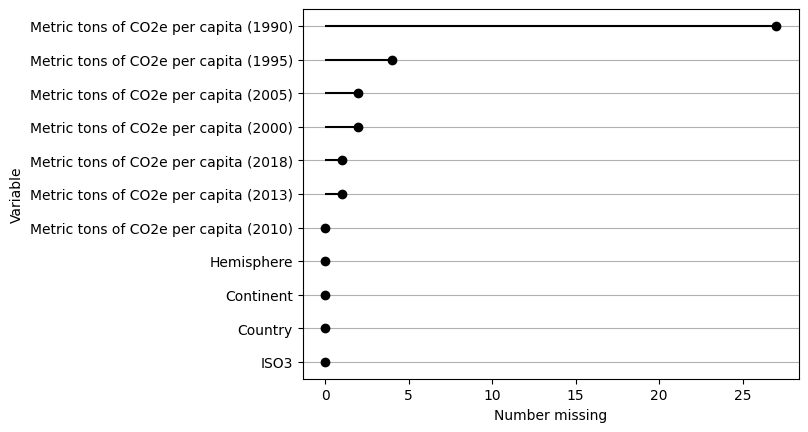

In [20]:
df.missing.missing_variable_plot()

<AxesSubplot:>

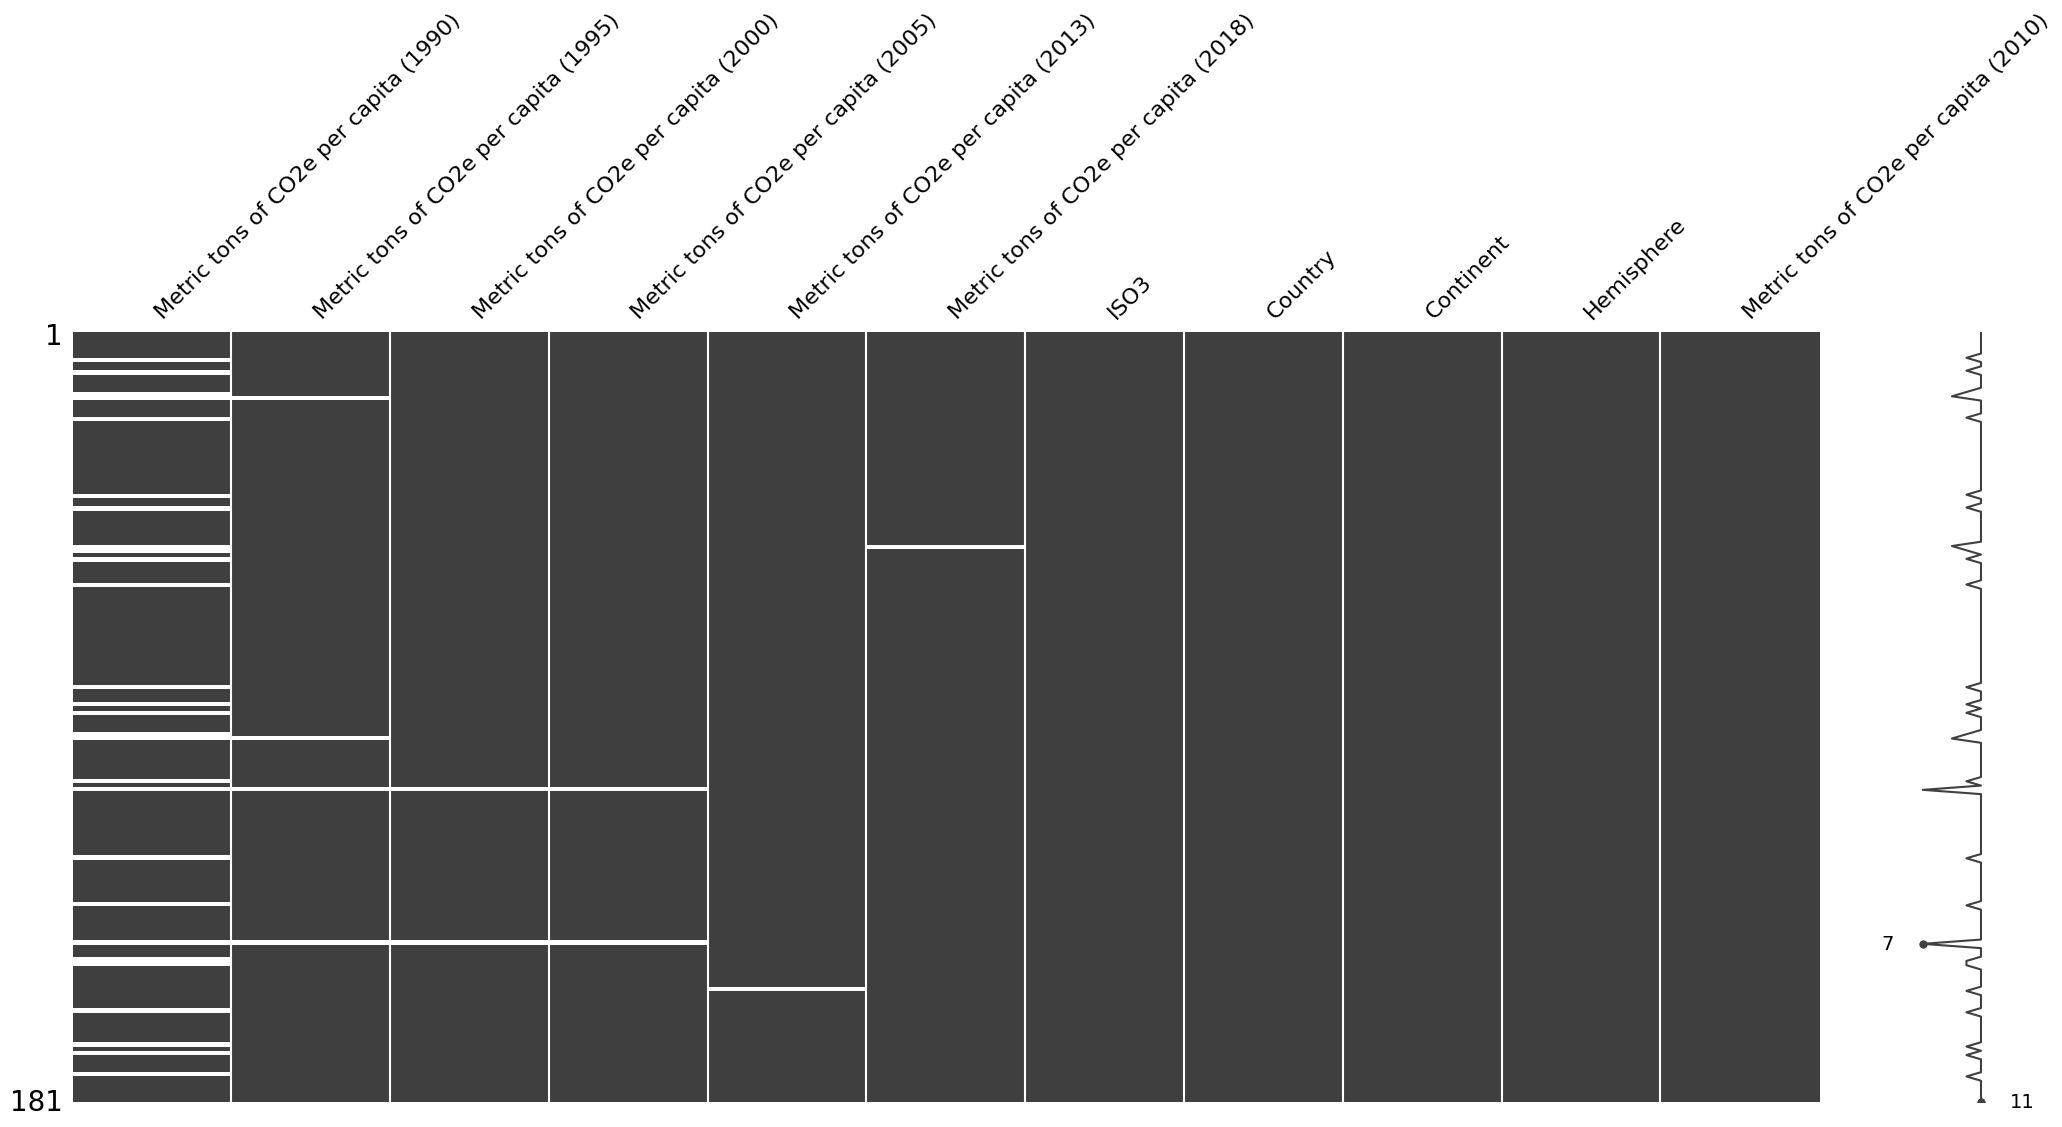

In [21]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

En el gráfico anterior, las líneas blancas representan valores faltantes. Podemos deducir que los valores faltantes en 1990 están distribuidos de forma regular, lo que indica que los faltantes se dan al azar. Los valores nulos serían entonces "missing completely at random (MCAR)".

<AxesSubplot:>

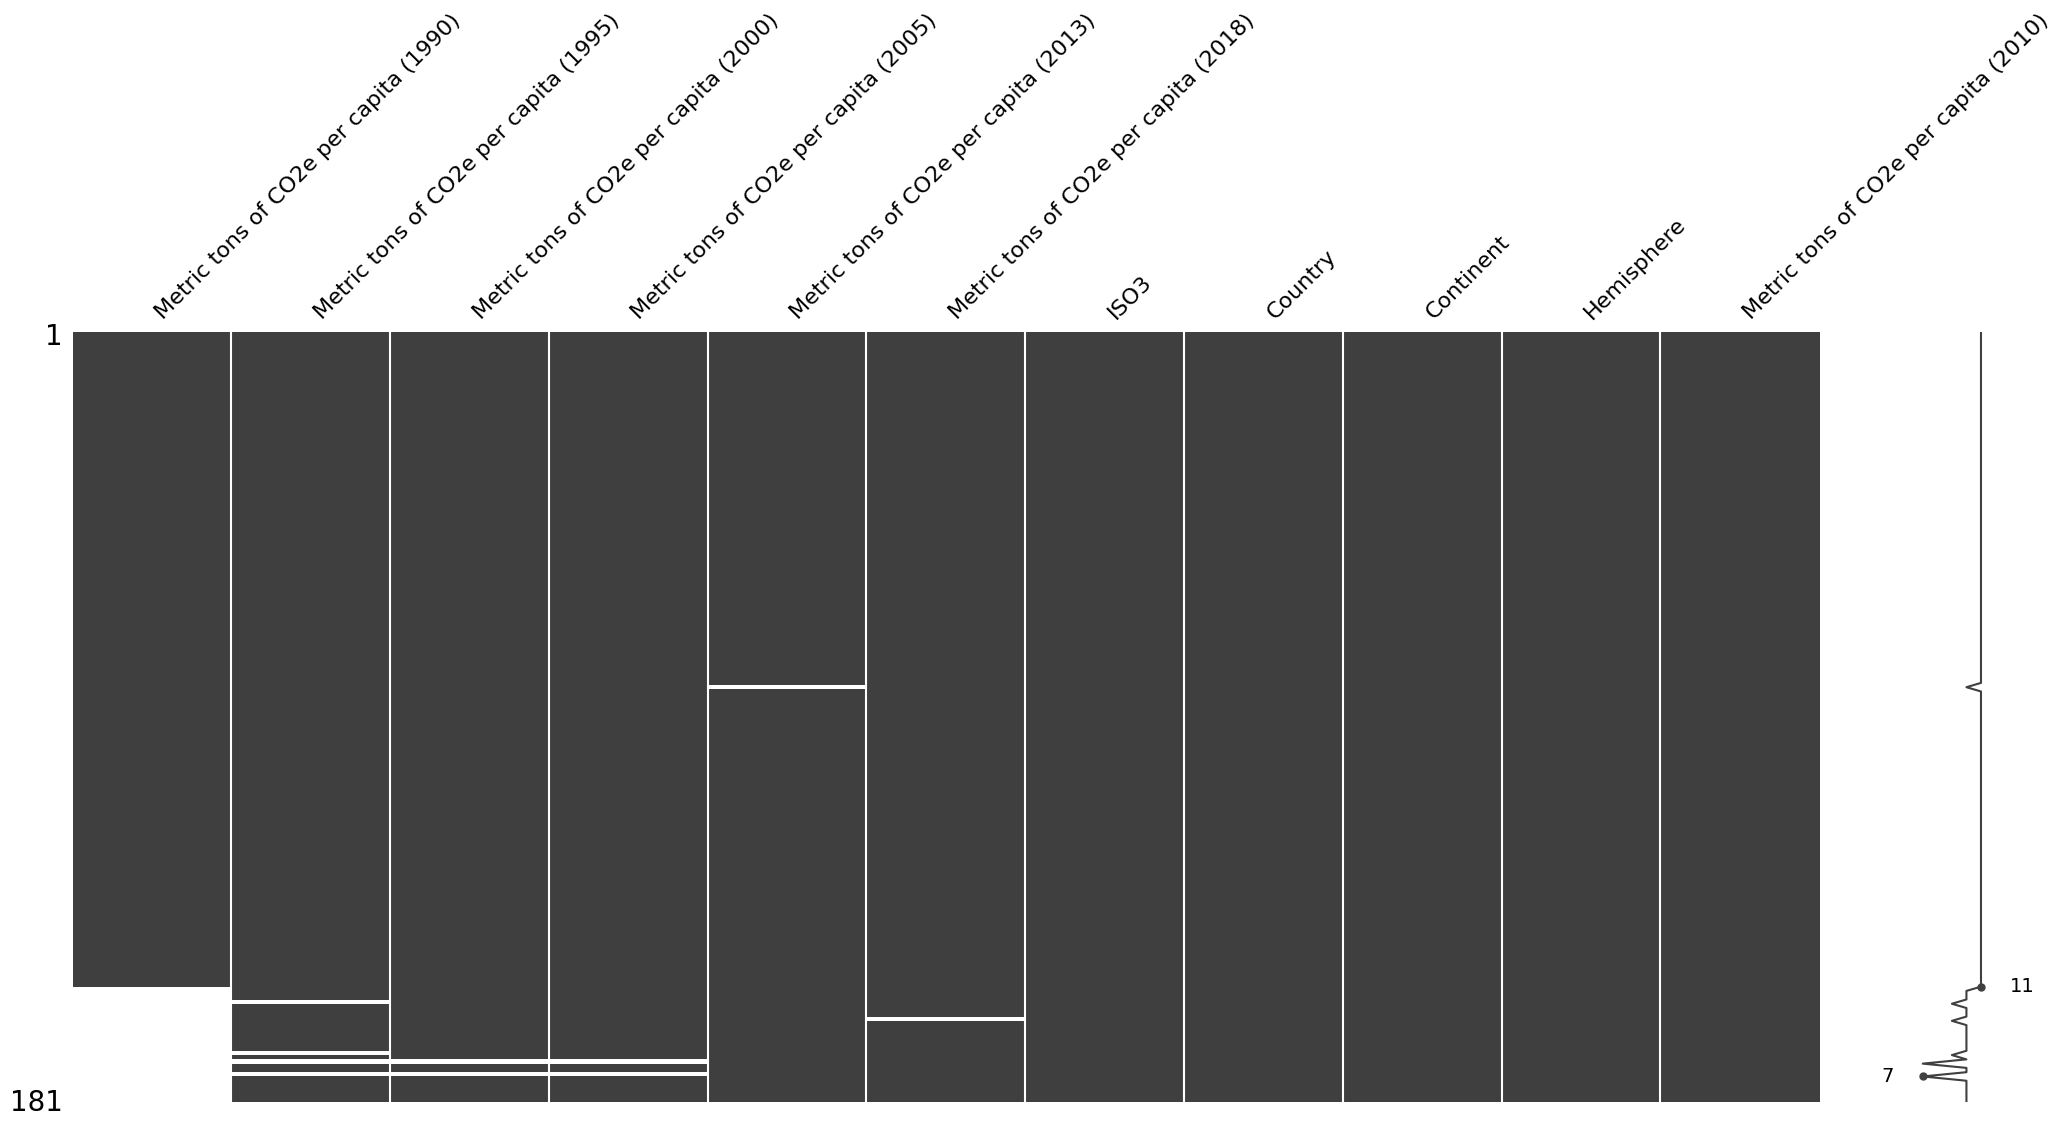

In [22]:
(
    df
    .missing.sort_variables_by_missingness()
    .sort_values("Metric tons of CO2e per capita (1990)")
    .pipe(missingno.matrix)
)

Observamos que al clasificar los nulos por columnas, podría haber una correlación entre los faltantes de 1990 y 1995. Sin embargo, al ser tan poca cantidad de valores faltantes optamos por eliminarlos. 

Quizás la eliminación de los datos sea una opción conveniente, pero decidimos imputar puesto que los datos faltantes seguramente estén muy relacionados con los valores reales previos, puesto que los cambios climáticos son progresivos y lentos. 


Los valores faltantes son Missing at random (MAR): evidentemente se localizan de forma puntual en una columna sin estar distribuidos en toda la base de datos por igual. 

quedé en curso de imputación

Imputación por la media teniendo como referencia el continente: 

In [32]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 1990
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (1990)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (1990) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (1990)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (1990)']) else row['Metric tons of CO2e per capita (1990)'],
    axis=1
)



Media de Metric tons of CO2e per capita (1990) por continente:
Continent
Africa      2.908824
America     6.528000
Asia        8.068478
Europe     10.028158
Oceania     7.033636
Name: Metric tons of CO2e per capita (1990), dtype: float64


Observamos que los valores faltantes en la columna Continent están correctamente imputados en el siguiente código: 

In [31]:
(
    df
    .isnull()
    .sum()
    
)

ISO3                                     0
Country                                  0
Continent                                0
Hemisphere                               0
Metric tons of CO2e per capita (1990)    0
Metric tons of CO2e per capita (1995)    4
Metric tons of CO2e per capita (2000)    2
Metric tons of CO2e per capita (2005)    2
Metric tons of CO2e per capita (2010)    0
Metric tons of CO2e per capita (2013)    1
Metric tons of CO2e per capita (2018)    1
dtype: int64

Realizamos el mismo trabajo sobre el año 1995, 2000, 2005, 2013 y 2018:

In [34]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 1990
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (1995)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (1995) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (1995)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (1995)']) else row['Metric tons of CO2e per capita (1995)'],
    axis=1
)

Media de Metric tons of CO2e per capita (1995) por continente:
Continent
Africa     2.826471
America    6.694286
Asia       9.670435
Europe     9.245000
Oceania    7.092727
Name: Metric tons of CO2e per capita (1995), dtype: float64


In [35]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 1990
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (2000)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (2000) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (2000)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (2000)']) else row['Metric tons of CO2e per capita (2000)'],
    axis=1
)

Media de Metric tons of CO2e per capita (2000) por continente:
Continent
Africa     3.077647
America    6.833714
Asia       9.698478
Europe     9.468056
Oceania    7.163636
Name: Metric tons of CO2e per capita (2000), dtype: float64


In [36]:
(
    df
    .isnull()
    .sum()
    
)

ISO3                                     0
Country                                  0
Continent                                0
Hemisphere                               0
Metric tons of CO2e per capita (1990)    0
Metric tons of CO2e per capita (1995)    0
Metric tons of CO2e per capita (2000)    0
Metric tons of CO2e per capita (2005)    2
Metric tons of CO2e per capita (2010)    0
Metric tons of CO2e per capita (2013)    1
Metric tons of CO2e per capita (2018)    1
dtype: int64

In [37]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 1990
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (2005)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (2005) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (2005)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (2005)']) else row['Metric tons of CO2e per capita (2005)'],
    axis=1
)

Media de Metric tons of CO2e per capita (2005) por continente:
Continent
Africa      3.392549
America     7.110857
Asia       10.222609
Europe      9.886111
Oceania     7.100000
Name: Metric tons of CO2e per capita (2005), dtype: float64


In [38]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 2013
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (2013)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (2013) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (2013)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (2013)']) else row['Metric tons of CO2e per capita (2013)'],
    axis=1
)

Media de Metric tons of CO2e per capita (2013) por continente:
Continent
Africa     3.257600
America    7.505714
Asia       9.868478
Europe     8.567368
Oceania    7.230909
Name: Metric tons of CO2e per capita (2013), dtype: float64


In [39]:
# Agrupa por continente y calcula la media de toneladas de CO2 por capita para 2018
mean_by_continent = df.groupby('Continent')['Metric tons of CO2e per capita (2018)'].mean()

# Muestra la media por continente
print("Media de Metric tons of CO2e per capita (2018) por continente:")
print(mean_by_continent)

# Imputa los valores faltantes con la media de su respectivo continente
df['Metric tons of CO2e per capita (2018)'] = df.apply(
    lambda row: mean_by_continent[row['Continent']] if pd.isnull(row['Metric tons of CO2e per capita (2018)']) else row['Metric tons of CO2e per capita (2018)'],
    axis=1
)

Media de Metric tons of CO2e per capita (2018) por continente:
Continent
Africa     3.220600
America    6.780286
Asia       9.294130
Europe     8.260789
Oceania    7.571818
Name: Metric tons of CO2e per capita (2018), dtype: float64


## Revisión final de faltantes
No hay faltantes en el df

In [40]:
(
    df
    .isnull()
    .sum()
    
)

ISO3                                     0
Country                                  0
Continent                                0
Hemisphere                               0
Metric tons of CO2e per capita (1990)    0
Metric tons of CO2e per capita (1995)    0
Metric tons of CO2e per capita (2000)    0
Metric tons of CO2e per capita (2005)    0
Metric tons of CO2e per capita (2010)    0
Metric tons of CO2e per capita (2013)    0
Metric tons of CO2e per capita (2018)    0
dtype: int64